In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

df = pd.read_csv("../../energy_dataset.csv")
#print(df.columns)
#print(df.head)
columns = ["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead", "generation fossil coal-derived gas", "generation wind offshore", "generation marine", "generation geothermal",
"generation fossil peat","generation fossil oil shale"]
df = df.drop(columns,axis = 1)
#plt.matshow(df.corr())
df.fillna(df.interpolate(method="linear"),inplace=True)
#plt.show()
#df.mean()
#df.var()
df["time"] = pd.to_datetime(df["time"],format = "%Y-%m-%d %H:%M:%S")
df['time'] = df['time'].apply(lambda x: x.replace(tzinfo=None))
df["time"] = pd.to_datetime(df["time"],format="ISO8601")
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df = df.set_index('time')
print(df["month"].value_counts(0)) 


12    2976
10    2976
8     2976
7     2976
5     2976
3     2976
1     2976
11    2880
9     2880
6     2880
4     2880
2     2712
Name: month, dtype: int64


In [27]:
"""splitting data"""
print(df.columns)
x = df.drop("total load actual",axis = 1)
y = df["total load actual"]
tss = TimeSeriesSplit(n_splits=2)
print(tss)
for train,test in tss.split(df):
    trainx, testx = x.iloc[train,:], x.iloc[test,:]
    trainy, testy = y.iloc[train], y.iloc[test]

len(testx)






Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
TimeSeriesSplit(max_train_size=None, n_splits=2)


11688

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

KeyError: True

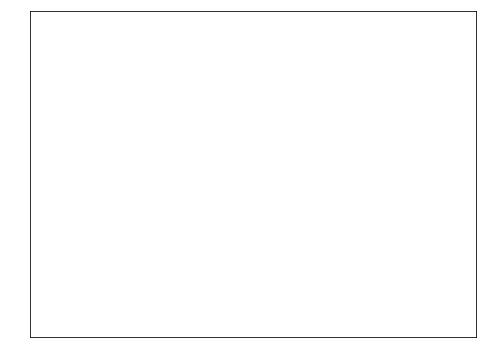

In [32]:
def feature_plot(feature,month = None,year = None):
    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    if month:
        dfmonth = df[feature].where(df[year == year] and df[month == month])
        plt.plot(df.index, dfmonth)
        
    else:
        plt.plot(df.index, df[feature])

def multi_plot(features):
    fig,axs = plt.subplots(len(features),figsize=(16,48))
    for x in range(len(features)):
        axs[x].plot(df.index, df[features[x]])
        axs[x].set_title(features[x],color = "white")
        axs[x].tick_params(axis='x', colors='white')
        axs[x].tick_params(axis='y', colors='white')
        
    fig.tight_layout()

feature_plot("total load actual",1,2015)
#multi_plot(["generation biomass","generation fossil brown coal/lignite","generation fossil gas"])



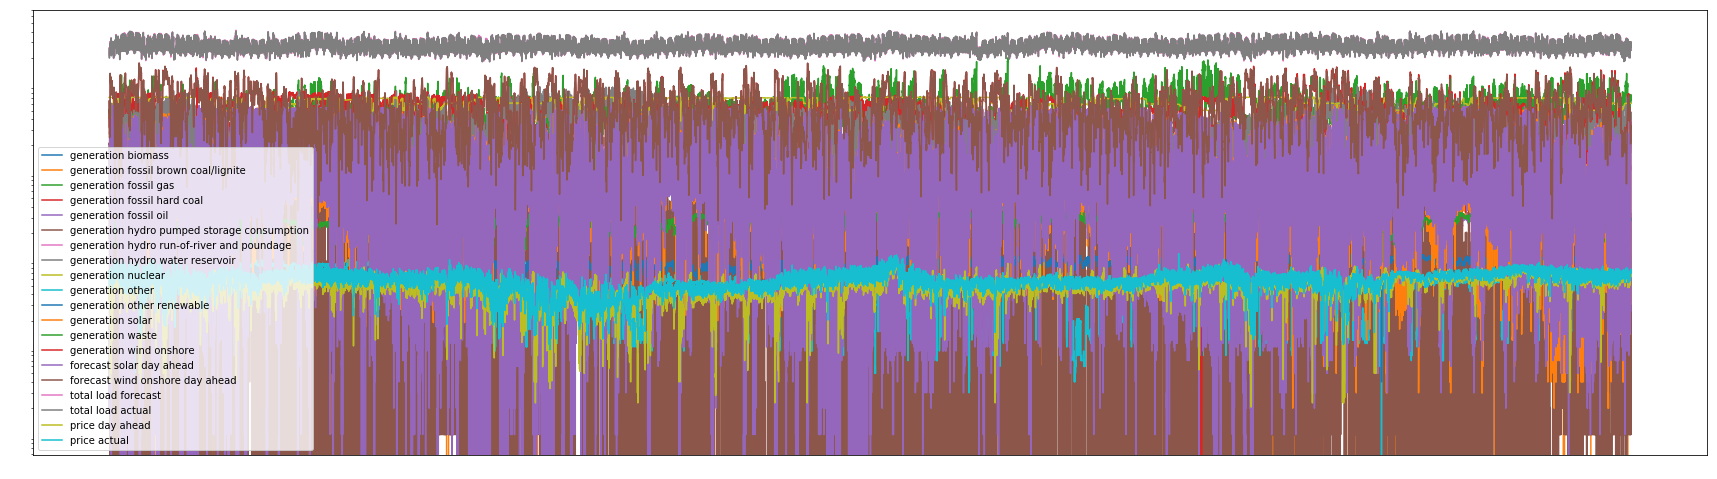

In [83]:
#plot all features
fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(2, 1, 1)
for column in df:
    ax.plot(df.index, df[column])
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_yscale("log")
ax.legend()